In [1]:
#impor library 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint
%matplotlib inline

#input Data 
df = pd.read_csv("C:\\Users\\lenovo\\Downloads\\DATA_UTP_MSD1.csv")

display(df)

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0
...,...,...,...,...,...,...
9995,1,49,Yes,4,2,23.0
9996,7,64,Yes,8,5,58.0
9997,6,83,Yes,8,5,74.0
9998,9,97,Yes,7,0,95.0


In [2]:
df.isnull().sum()

Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

In [3]:
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [4]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

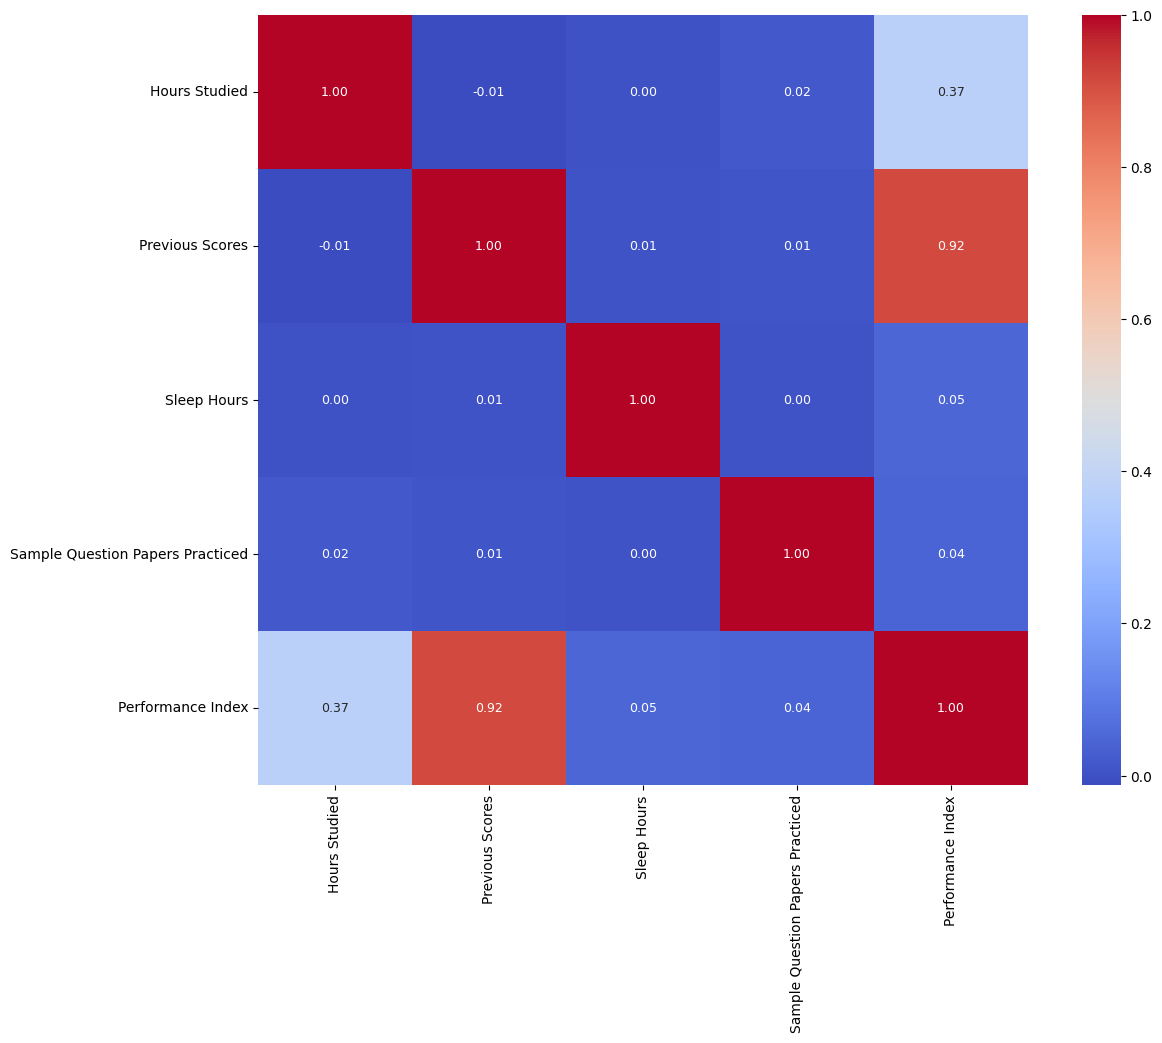

In [5]:
corrMatrix = df.corr(numeric_only=True)
plt.figure(figsize=(14, 10))
sns.heatmap(corrMatrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, cbar=True, annot_kws={"size":9})

plt.show()

In [6]:
df.columns

Index(['Hours Studied', 'Previous Scores', 'Extracurricular Activities',
       'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index'],
      dtype='object')

In [25]:
X = df[['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']]
y = df["Performance Index"]

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [28]:
lreg = LinearRegression()
lreg.fit(X_train, y_train)

LinearRegression()

In [29]:
print("Model Coefficients")
for col, coef in zip(X.columns, lreg.coef_):
    print(f'{col:>20}: {coef:>8.4f}')

Model Coefficients
       Hours Studied:   2.8532
     Previous Scores:   1.0191
         Sleep Hours:   0.4716
Sample Question Papers Practiced:   0.1888


Text(0.5, 1.0, 'Koefisien regresi Linear')

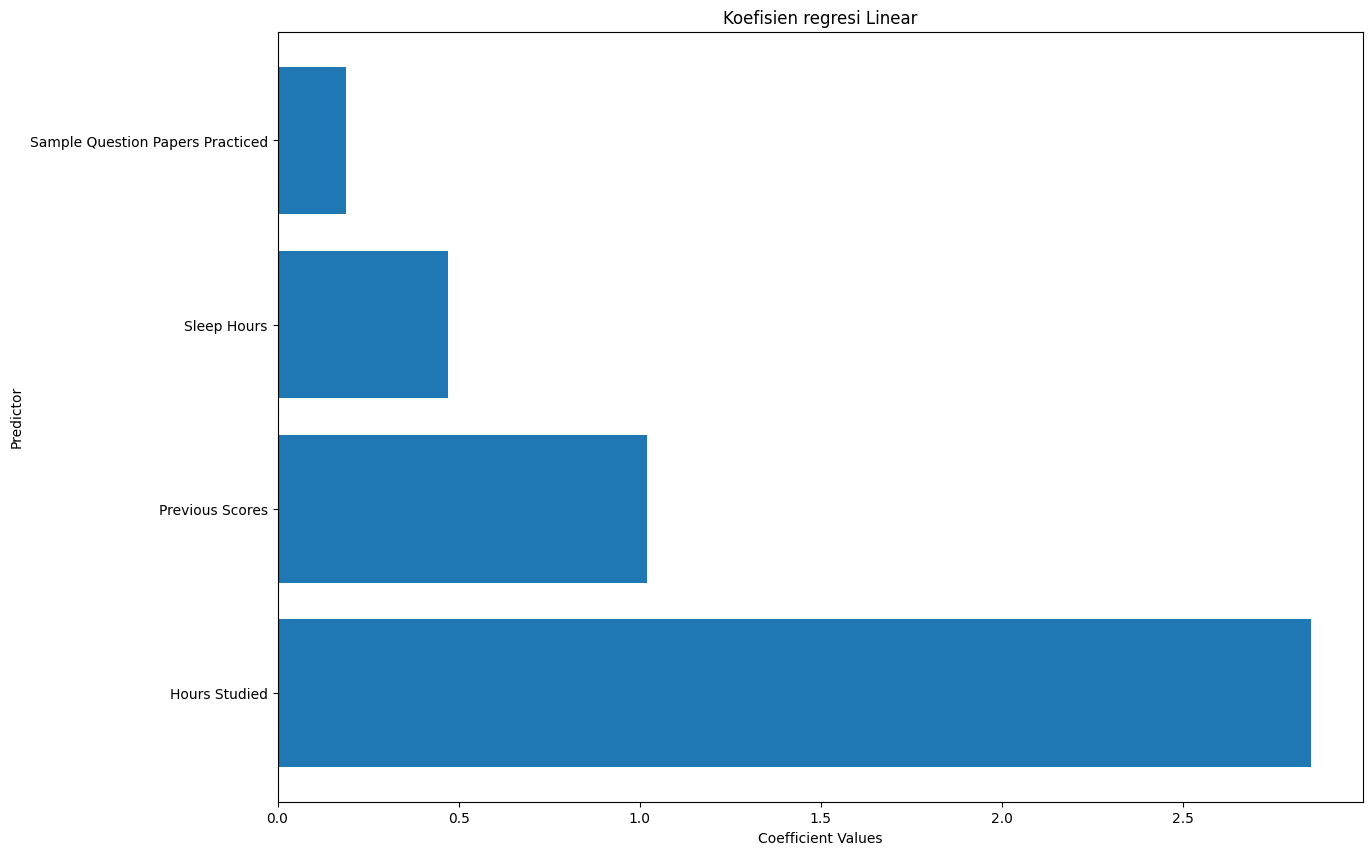

In [ ]:
plt.figure(figsize=(14,10))
cols = X.columns
coefs = lreg.coef_

plt.barh(cols, coefs)
plt.axvline(0, c='k', ls='--', alpha=0.5)

plt.ylabel('Predictor')
plt.xlabel('Coefficient Values')
plt.title('Koefisien regresi Linear')


In [15]:
train_detKoef = lreg.score(X_train, y_train)
test_detKoef = lreg.score(X_test, y_test)

print('Train R2:', train_detKoef)
print('Test R2:', test_detKoef)

Train R2: 0.9886087194897399
Test R2: 0.9879991283609477


In [16]:
y_pred_train = lreg.predict(X_train) # memprediksi variabel respons pada training dataset
MSE_train = mean_squared_error(y_train, y_pred_train) # Menghitung MSE pada traing dataset
y_pred_test = lreg.predict(X_test) # memprediksi vairabel respons pda testing dataset
MSE_test = mean_squared_error(y_test, y_pred_test) # Menghitung MSE pada testing dataset

In [17]:
print('Train MSE:', MSE_train)
print('Test MSE:', MSE_test)

Train MSE: 4.274694411673067
Test MSE: 4.129528706087852


In [18]:
mse_list= []
R2_list= []
kolom = [['Hours Studied'], ['Previous Scores'], ['Sleep Hours'], ['Sample Question Papers Practiced']]

In [19]:
from itertools import combinations

base_cols = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

cols = []
for i in range(1, len(base_cols)+1):
    for combo in combinations(base_cols, i):
        cols.append(list(combo))


In [20]:
for i in cols:
    x = df[i]
    y = df['Performance Index']
    # membagi data, 80% sebagai training dataset sisanya sebagai datatest
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=0)
    lreg = LinearRegression()
    lreg.fit(x_train, y_train)
    y_pred = lreg.predict(x_test)
    MSE = mean_squared_error(y_test, y_pred)
    R2 = lreg.score(x_test, y_test)
    mse_list.append(MSE)
    R2_list.append(R2)

In [21]:
print(len(cols), len(mse_list), len(R2_list))


15 15 15


In [22]:
#library untuk membentuk tabel
from prettytable import PrettyTable

In [23]:
t = PrettyTable(['Predictors', 'MSE', 'R2'])

# perulangan untuk mengisi tiap baris tabel dengan kombinasi variabel prediktor ke i
# dan juga masing masing MSE dan R2 nya
for i in range(len(mse_list)):
    t.add_row([", ".join(cols[i]) if isinstance(cols[i], list) else cols[i], round(mse_list[i], 3), round(R2_list[i], 3)])


print(t.get_string())

+-------------------------------------------------------------------------------+---------+--------+
|                                   Predictors                                  |   MSE   |   R2   |
+-------------------------------------------------------------------------------+---------+--------+
|                                 Hours Studied                                 | 300.041 | 0.128  |
|                                Previous Scores                                |  59.906 | 0.826  |
|                                  Sleep Hours                                  | 345.033 | -0.003 |
|                        Sample Question Papers Practiced                       | 343.513 | 0.002  |
|                         Hours Studied, Previous Scores                        |  5.235  | 0.985  |
|                           Hours Studied, Sleep Hours                          | 300.328 | 0.127  |
|                Hours Studied, Sample Question Papers Practiced                | 299.465 |

In [24]:
data_baru = [[7, 89, 8, 4]]
prediksi = lreg.predict(data_baru)
print(prediksi)

[81.46449569]


c:\Users\lenovo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
